In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
csv1_path = "../results/empirical_results_pr_48_17_14_01_2025.csv"
csv2_path = "../results/empirical_results_grasp_39_17_14_01_2025.csv" 
csv3_path = "../results/empirical_results_tabu_35_19_14_01_2025.csv" 


df1 = pd.read_csv(csv1_path)
df2 = pd.read_csv(csv2_path)
df3 = pd.read_csv(csv3_path)

# Merge the two datasets on instance_name for comparison
comparison_df = pd.merge(df1, df2, on="instance_name", suffixes=("", "_grasp"))
comparison_df = pd.merge(comparison_df, df3, on="instance_name", suffixes=("_pr", "_tabu"))
comparison_df

,instance_name,objective_value_pr,runtime_pr,best_solution_pr,objective_value_grasp,runtime_grasp,best_solution_grasp,objective_value_tabu,runtime_tabu,best_solution_tabu
0,MDG-a_10_100_m10.txt,355.50,3.11,34 68 69 73 74 12 14 51 52 90,355.50,2.76,34 68 69 73 74 12 14 51 52 90,355.50,14.20,34 68 69 73 74 12 14 51 52 90
1,MDG-a_12_100_m10.txt,354.25,3.70,64 96 13 15 51 20 86 55 59 93,354.25,2.76,64 96 13 15 51 20 86 55 59 93,354.25,14.54,64 96 13 15 51 20 86 55 59 93
2,MDG-a_13_n500_m50.txt,7762.48,94.38,384 0 10 397 13 271 15 403 404 281 25 153 411 ...,7762.48,54.17,384 0 10 397 13 271 15 403 404 281 25 153 411 ...,7762.48,295.23,384 0 10 397 13 271 15 403 404 281 25 153 411 ...
3,MDG-a_14_100_m10.txt,356.06,2.27,65 67 72 51 53 22 30 25 94 95,356.06,2.42,65 67 72 51 53 22 30 25 94 95,356.06,15.09,65 67 72 51 53 22 30 25 94 95
4,MDG-a_16_n500_m50.txt,7776.17,93.23,0 3 264 136 10 138 21 280 158 159 33 161 294 2...,7768.84,55.93,0 3 264 10 136 21 280 158 159 33 161 294 295 4...,7776.17,308.82,0 3 264 136 10 138 21 280 158 159 33 161 294 2...
5,MDG-a_17_n500_m50.txt,7785.98,89.02,131 140 141 10 16 402 273 148 150 280 25 284 4...,7785.98,54.69,131 140 141 10 16 402 273 148 150 280 25 284 4...,7785.98,294.13,131 140 141 10 16 402 273 148 150 280 25 284 4...
6,MDG-a_19_n500_m50.txt,7726.83,90.83,385 131 133 390 137 395 271 15 404 277 406 280...,7712.06,55.82,385 131 5 390 137 395 404 277 280 154 155 412 ...,7726.83,299.64,385 131 133 390 137 395 271 15 404 277 406 280...
7,MDG-a_1_100_m10.txt,360.15,2.06,1 26 37 74 43 13 80 31 86 57,360.15,2.22,1 26 37 74 43 13 80 31 86 57,360.15,14.95,1 26 37 74 43 13 80 31 86 57
8,MDG-a_20_100_m10.txt,349.31,2.62,67 40 77 82 52 53 85 25 92 93,349.31,2.23,67 40 77 82 52 85 53 25 92 93,349.31,15.78,67 40 77 82 52 53 85 25 92 93
9,MDG-a_20_n500_m50.txt,7716.85,96.25,130 393 394 395 269 402 21 151 410 27 284 156 ...,7703.75,52.63,257 130 388 392 394 395 272 17 20 408 153 410 ...,7716.85,327.74,130 393 394 395 269 402 21 151 410 27 284 156 ...


In [18]:
# Add a column to differentiate instances by size (500 or 100)
comparison_df["instance_size"] = comparison_df["instance_name"].apply(
    lambda x: "500" if "n500" in x else "100"
)

comparison_df


,instance_name,objective_value_pr,runtime_pr,best_solution_pr,objective_value_grasp,runtime_grasp,best_solution_grasp,objective_value_tabu,runtime_tabu,best_solution_tabu,instance_size
0,MDG-a_10_100_m10.txt,355.50,3.11,34 68 69 73 74 12 14 51 52 90,355.50,2.76,34 68 69 73 74 12 14 51 52 90,355.50,14.20,34 68 69 73 74 12 14 51 52 90,100
1,MDG-a_12_100_m10.txt,354.25,3.70,64 96 13 15 51 20 86 55 59 93,354.25,2.76,64 96 13 15 51 20 86 55 59 93,354.25,14.54,64 96 13 15 51 20 86 55 59 93,100
2,MDG-a_13_n500_m50.txt,7762.48,94.38,384 0 10 397 13 271 15 403 404 281 25 153 411 ...,7762.48,54.17,384 0 10 397 13 271 15 403 404 281 25 153 411 ...,7762.48,295.23,384 0 10 397 13 271 15 403 404 281 25 153 411 ...,500
3,MDG-a_14_100_m10.txt,356.06,2.27,65 67 72 51 53 22 30 25 94 95,356.06,2.42,65 67 72 51 53 22 30 25 94 95,356.06,15.09,65 67 72 51 53 22 30 25 94 95,100
4,MDG-a_16_n500_m50.txt,7776.17,93.23,0 3 264 136 10 138 21 280 158 159 33 161 294 2...,7768.84,55.93,0 3 264 10 136 21 280 158 159 33 161 294 295 4...,7776.17,308.82,0 3 264 136 10 138 21 280 158 159 33 161 294 2...,500
5,MDG-a_17_n500_m50.txt,7785.98,89.02,131 140 141 10 16 402 273 148 150 280 25 284 4...,7785.98,54.69,131 140 141 10 16 402 273 148 150 280 25 284 4...,7785.98,294.13,131 140 141 10 16 402 273 148 150 280 25 284 4...,500
6,MDG-a_19_n500_m50.txt,7726.83,90.83,385 131 133 390 137 395 271 15 404 277 406 280...,7712.06,55.82,385 131 5 390 137 395 404 277 280 154 155 412 ...,7726.83,299.64,385 131 133 390 137 395 271 15 404 277 406 280...,500
7,MDG-a_1_100_m10.txt,360.15,2.06,1 26 37 74 43 13 80 31 86 57,360.15,2.22,1 26 37 74 43 13 80 31 86 57,360.15,14.95,1 26 37 74 43 13 80 31 86 57,100
8,MDG-a_20_100_m10.txt,349.31,2.62,67 40 77 82 52 53 85 25 92 93,349.31,2.23,67 40 77 82 52 85 53 25 92 93,349.31,15.78,67 40 77 82 52 53 85 25 92 93,100
9,MDG-a_20_n500_m50.txt,7716.85,96.25,130 393 394 395 269 402 21 151 410 27 284 156 ...,7703.75,52.63,257 130 388 392 394 395 272 17 20 408 153 410 ...,7716.85,327.74,130 393 394 395 269 402 21 151 410 27 284 156 ...,500


In [20]:
# Calculate differences
comparison_df["objective_diff_pr"] = comparison_df["objective_value_pr"] - comparison_df["objective_value_grasp"]
comparison_df["runtime_diff_pr"] = comparison_df["runtime_pr"] - comparison_df["runtime_grasp"]

comparison_df["objective_diff_tabu"] = comparison_df["objective_value_tabu"] - comparison_df["objective_value_grasp"]
comparison_df["runtime_diff_tabu"] = comparison_df["runtime_tabu"] - comparison_df["runtime_grasp"]


# Summary statistics
print("Summary Statistics:")
print(comparison_df[["objective_diff_pr", "runtime_diff_pr", "objective_diff_tabu", "runtime_diff_tabu"]].describe())

Summary Statistics:
       objective_diff_pr  runtime_diff_pr  objective_diff_tabu  \
count          15.000000        15.000000            15.000000   
mean            3.538667        25.238667             3.538667   
std             5.448372        21.545384             5.448372   
min             0.000000        -0.160000             0.000000   
25%             0.000000         0.370000             0.000000   
50%             0.000000        35.010000             0.000000   
75%             8.035000        43.025000             8.035000   
max            14.770000        49.380000            14.770000   

       runtime_diff_tabu  
count           15.00000  
mean           160.83800  
std            125.94666  
min             11.44000  
25%             12.79500  
50%            241.06000  
75%            266.85500  
max            283.94000  


In [21]:
# Split the data into 500-element and 100-element instances
df_500 = comparison_df[comparison_df["instance_size"] == "500"]
df_100 = comparison_df[comparison_df["instance_size"] == "100"]

print("Summary Statistics:")
print(df_100[["objective_diff_pr", "runtime_diff_pr"]].describe())

print("Summary Statistics:")
print(df_500[["objective_diff_pr", "runtime_diff_pr"]].describe())

print(df_100[["objective_diff_tabu", "runtime_diff_tabu"]].describe())

print("Summary Statistics:")
print(df_500[["objective_diff_tabu", "runtime_diff_tabu"]].describe())

Summary Statistics:
       objective_diff_pr  runtime_diff_pr
count                6.0         6.000000
mean                 0.0         0.250000
std                  0.0         0.411874
min                  0.0        -0.160000
25%                  0.0        -0.080000
50%                  0.0         0.240000
75%                  0.0         0.380000
max                  0.0         0.940000
Summary Statistics:
       objective_diff_pr  runtime_diff_pr
count           9.000000         9.000000
mean            5.897778        41.897778
std             6.024585         5.631019
min             0.000000        34.330000
25%             0.000000        37.300000
50%             7.330000        42.430000
75%             9.140000        45.790000
max            14.770000        49.380000
       objective_diff_tabu  runtime_diff_tabu
count                  6.0           6.000000
mean                   0.0          12.505000
std                    0.0           0.768863
min                 

In [22]:
df_500.select_dtypes(include='number').aggregate('mean'), df_100.select_dtypes(include='number').aggregate('mean')

(objective_value_pr       7747.622222
 runtime_pr                 94.844444
 objective_value_grasp    7741.724444
 runtime_grasp              52.946667
 objective_value_tabu     7747.622222
 runtime_tabu              312.673333
 objective_diff_pr           5.897778
 runtime_diff_pr            41.897778
 objective_diff_tabu         5.897778
 runtime_diff_tabu         259.726667
 dtype: float64,
 objective_value_pr       355.165000
 runtime_pr                 2.668333
 objective_value_grasp    355.165000
 runtime_grasp              2.418333
 objective_value_tabu     355.165000
 runtime_tabu              14.923333
 objective_diff_pr          0.000000
 runtime_diff_pr            0.250000
 objective_diff_tabu        0.000000
 runtime_diff_tabu         12.505000
 dtype: float64)

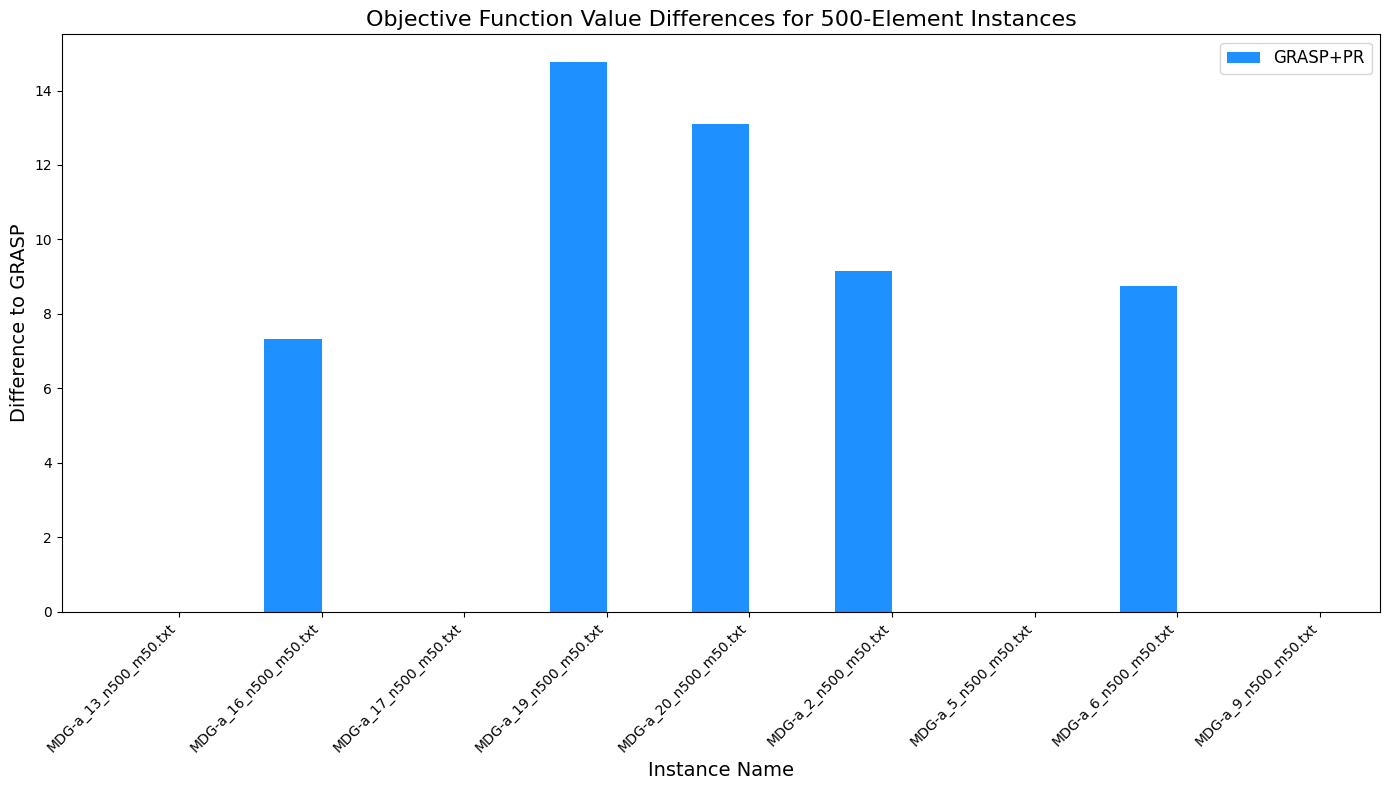

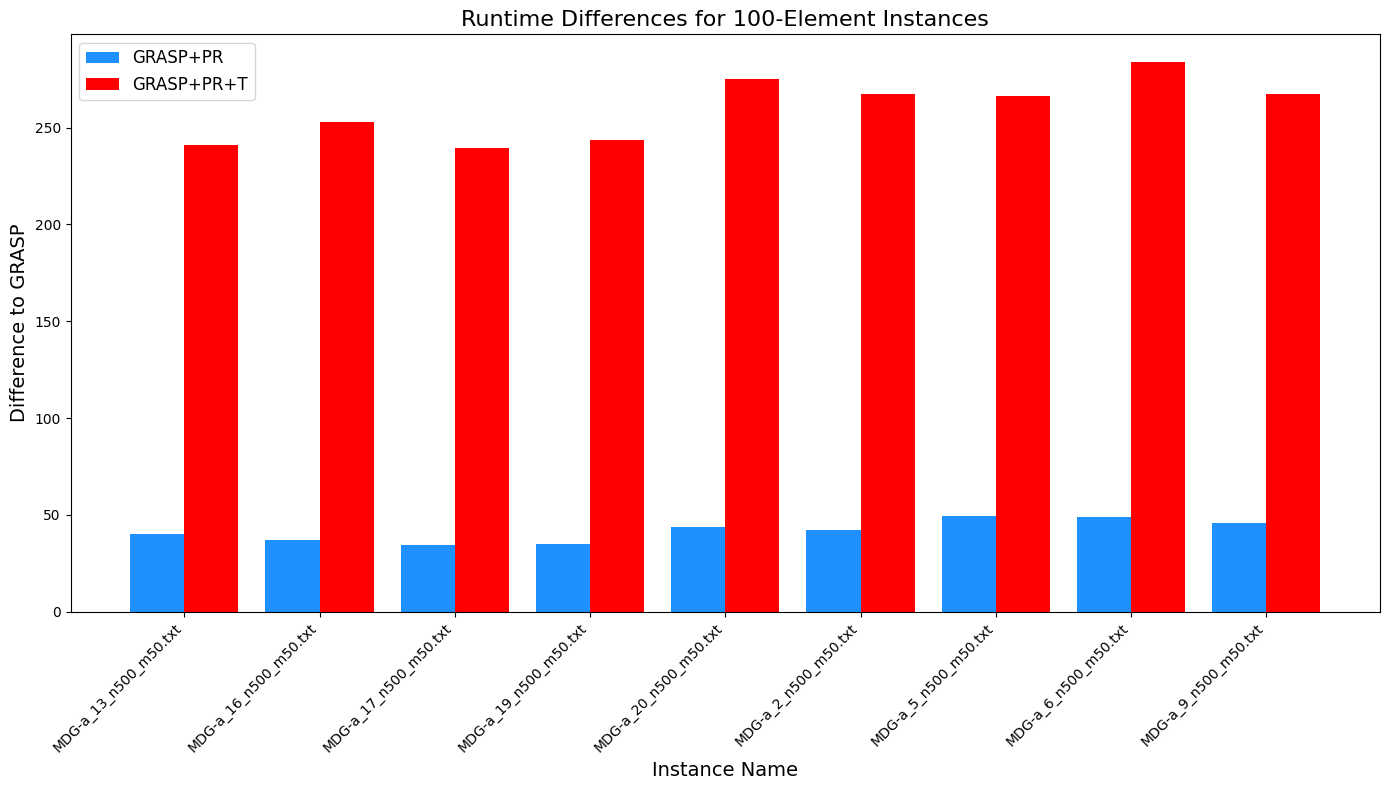

In [ ]:
# Add a column to differentiate instances by size (500 or 100)
comparison_df["instance_size"] = comparison_df["instance_name"].apply(
    lambda x: "500" if "n500" in x else "100"
)

# Split the data into 500-element and 100-element instances
df_500 = comparison_df[comparison_df["instance_size"] == "500"]
df_100 = comparison_df[comparison_df["instance_size"] == "100"]

# Plot Objective Function (OF) values for 500-element instances
plt.figure(figsize=(14, 8))
df_500 = df_500.sort_values("instance_name")
bar_width = 0.4
x = range(len(df_500))
x_pr = [i - bar_width / 2 for i in x]
x_grasp = [i + bar_width / 2 for i in x]

plt.bar(x_pr, df_500["objective_diff_pr"], width=bar_width, label="GRASP+PR", color="dodgerblue")
# plt.bar(x_grasp, df_500["objective_diff_tabu"], width=bar_width, label="GRASP+PR+T", color="red")

plt.title("Objective Function Value Differences for 500-Element Instances", fontsize=16)
plt.xlabel("Instance Name", fontsize=14)
plt.ylabel("Difference to GRASP", fontsize=14)
plt.xticks(ticks=x, labels=df_500["instance_name"], rotation=45, ha="right", fontsize=10)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Plot Objective Function (OF) values for 100-element instances
plt.figure(figsize=(14, 8))
df_100 = df_100.sort_values("instance_name")
#x = range(len(df_100))
x = range(len(df_500))
x_pr = [i - bar_width / 2 for i in x]
x_grasp = [i + bar_width / 2 for i in x]

plt.bar(x_pr, df_500["runtime_diff_pr"], width=bar_width, label="GRASP+PR", color="dodgerblue")
plt.bar(x_grasp, df_500["runtime_diff_tabu"], width=bar_width, label="GRASP+PR+T", color="red")

plt.title("Runtime Differences for 100-Element Instances", fontsize=20)
plt.xlabel("Instance Name", fontsize=18)
plt.ylabel("Difference to GRASP", fontsize=18)
plt.xticks(ticks=x, labels=df_500["instance_name"], rotation=45, ha="right", fontsize=14)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig("runtime_differences_plot.pdf", format="pdf")
plt.show()